<a href="https://colab.research.google.com/github/saghar-trade/deep-learning/blob/main/RNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:

!pip install keras

In [42]:
!pip install tensorflow

In [43]:
import warnings
warnings.filterwarnings("ignore")

In [44]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np




In [45]:
(x_train, _),(x_test, _)=mnist.load_data()

In [46]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

noise_factor=0.5
x_train_noisy=x_train+noise_factor*np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy=x_test+noise_factor*np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy=np.clip(x_train_noisy,0. , 1.)
x_test_noisy=np.clip(x_test_noisy, 0. , 1.)


print('shape of x_train: ',x_train.shape )
print('shape of x_test :',x_test.shape )

shape of x_train:  (60000, 28, 28)
shape of x_test : (10000, 28, 28)


In [47]:
x_train=x_train.reshape (len(x_train),784)
x_test=x_test.reshape (len(x_test),784)

x_train_noisy=x_train_noisy.reshape (len(x_train_noisy),784)
x_test_noisy=x_test_noisy.reshape (len(x_test_noisy),784)

print('shape of x_train :',x_train.shape )
print('shape of x_test :',x_test.shape )

shape of x_train : (60000, 784)
shape of x_test : (10000, 784)


In [48]:
input_img=Input(shape=(784,))
encoder=Dense(units=32, activation='relu')(input_img)
decoder=Dense(units=784, activation='sigmoid')(encoder)
autoencoder=Model(input_img,decoder)
autoencoder.summary()


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 784)            │        25,872 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy,x_train, epochs=30, batch_size=256)


Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.3634
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.2073
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1748
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1582
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1469
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1405
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1361
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1332
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1310
Epoch 10/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1296
Epoch 11/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1286
Epoch 12/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1280
Epoch 13/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1275
Epoch 14/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1269
Epoch 15/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/ste

In [50]:
encoder_model=Model(input_img,encoder)
encoder_model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │        25,120 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,120 (98.12 KB)

 Trainable params: 25,120 (98.12 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
pred=autoencoder.predict(x_test_noisy)
encoded_imgages=encoder_model.predict(x_test_noisy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


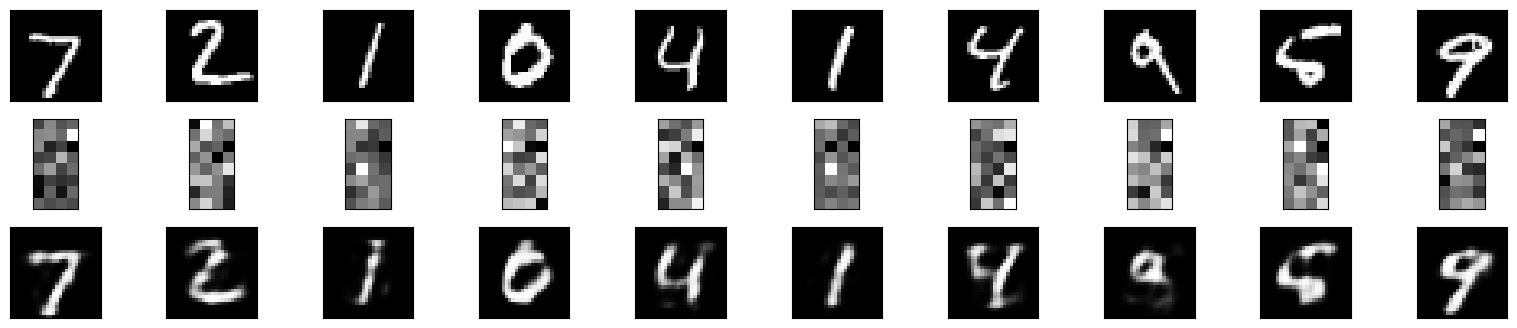

In [52]:
plt.figure(figsize=(40,4))
for i in range(10):
  #display originals
  ax=plt.subplot(3,20,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #disply encoded image
  ax=plt.subplot(3,20,i+1+20)
  plt.imshow(encoded_imgages[i].reshape(8,4))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #display reconstruction
  ax=plt.subplot(3,20,2*20+i+1)
  plt.imshow(pred[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)




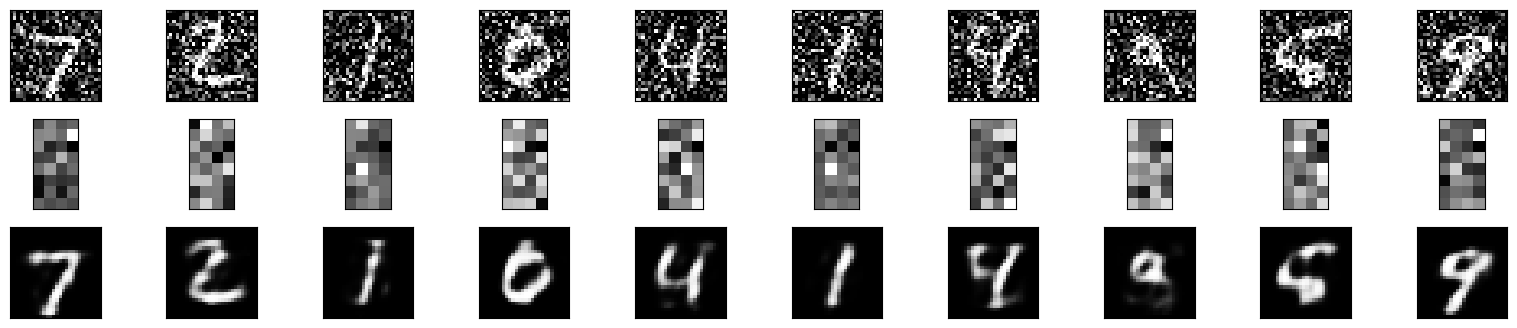

In [53]:
plt.figure(figsize=(40,4))
for i in range(10):
  #display originals
  ax=plt.subplot(3,20,i+1)
  plt.imshow(x_test_noisy[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #disply encoded image
  ax=plt.subplot(3,20,i+1+20)
  plt.imshow(encoded_imgages[i].reshape(8,4))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #display reconstruction
  ax=plt.subplot(3,20,2*20+i+1)
  plt.imshow(pred[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)